In [105]:
# Libraries needed (pandas is not standard and must be installed in Python)
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np

# Insert your own client ID here
with open("../ignore_me/frost_client.txt") as f: client_id = f.read().strip()



In [160]:
#Getting temperature data from Kvaloysletta station
endpoint = 'https://frost.met.no/observations/v0.jsonld'
parameters = {
    'sources': 'SN90560',
    'elements': 'mean(air_temperature P1D), sum(precipitation_amount P1D)',
    'referencetime': '1950-04/2020-05-03',
}
# Issue an HTTP GET request
r = requests.get(endpoint, parameters, auth=(client_id,''))
# Extract JSON data
val = r.json()


In [161]:
# Check if the request worked, print out any errors
if r.status_code == 200:
    data = val['data']
    print('Data retrieved from frost.met.no!')
else:
    print('Error! Returned status code %s' % r.status_code)
    print('Message: %s' % val['error']['message'])
    print('Reason: %s' % val['error']['reason'])


Data retrieved from frost.met.no!


In [162]:
# This will return a Dataframe with all of the observations in a table format
df = pd.DataFrame()
for i in range(len(data)):
    row = pd.DataFrame(data[i]['observations'])
    row['referenceTime'] = data[i]['referenceTime']
    row['sourceId'] = data[i]['sourceId']
    df = pd.concat([df, row], ignore_index=True)

df = df.reset_index()


In [163]:
val 


{'@context': 'https://frost.met.no/schema',
 '@type': 'ObservationResponse',
 'apiVersion': 'v0',
 'license': 'https://creativecommons.org/licenses/by/3.0/no/',
 'createdAt': '2025-02-27T13:38:35Z',
 'queryTime': 2.922,
 'currentItemCount': 3117,
 'itemsPerPage': 3117,
 'offset': 0,
 'totalItemCount': 3117,
 'currentLink': 'https://frost.met.no/observations/v0.jsonld?sources=SN90560&elements=mean%28air_temperature+P1D%29%2C+sum%28precipitation_amount+P1D%29&referencetime=1950-04%2F2020-05-03',
 'data': [{'sourceId': 'SN90560:0',
   'referenceTime': '2011-10-21T00:00:00.000Z',
   'observations': [{'elementId': 'mean(air_temperature P1D)',
     'value': 4.1,
     'unit': 'degC',
     'level': {'levelType': 'height_above_ground', 'unit': 'm', 'value': 2},
     'timeOffset': 'PT0H',
     'timeResolution': 'P1D',
     'timeSeriesId': 0,
     'performanceCategory': 'E',
     'exposureCategory': '1',
     'qualityCode': 2}]},
  {'sourceId': 'SN90560:0',
   'referenceTime': '2011-10-22T00:00:0

In [122]:
len(data)
temp_list = []
date_list = []
for time in range(0,len(data)-1): 
    temp_list.append(data[time]['observations'][0]['value'])
    date_list.append(data[time]['referenceTime'])

date_list[1]


'2011-10-22T00:00:00.000Z'

In [109]:

converted_dates = [datetime.datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%fZ") for date in date_list]

print(converted_dates[1])  # Output: [datetime.datetime(2024, 2, 25, 0, 0), datetime.datetime(2023, 12, 31, 0, 0)]


2011-10-22 00:00:00


(array([14610., 15340., 16071., 16801., 17532., 18262.]),
 [Text(14610.0, 0, '2010'),
  Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018'),
  Text(18262.0, 0, '2020')])

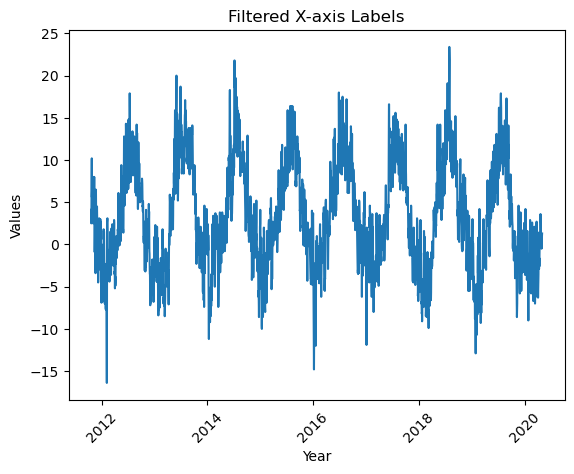

In [118]:
# Plotting the data
fig, ax = plt.subplots()
ax.plot(converted_dates, temp_list)

# Format x-axis to only show the year
ax.xaxis.set_major_locator(mdates.YearLocator(2))  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  

plt.xlabel("Year")
plt.ylabel("Values")
plt.title("Filtered X-axis Labels")
plt.xticks(rotation=45) 



In [ ]:
#Checking what possible data can be extracted from station Kvaloya
station_id = 'SN90560'
endpoint = 'https://frost.met.no/observations/availableTimeSeries/v0.jsonld'
parameters = {
    'sources': station_id,
}
r = requests.get(endpoint, parameters, auth=(client_id,''))
val = r.json()


In [124]:
# Check if the request worked, print out any errors
if r.status_code == 200:
    data = val['data']
    print('Data retrieved from frost.met.no!')
else:
    print('Error! Returned status code %s' % r.status_code)
    print('Message: %s' % val['error']['message'])
    print('Reason: %s' % val['error']['reason'])


Data retrieved from frost.met.no!


In [148]:
val['data'][0].keys()


dict_keys(['sourceId', 'validFrom', 'validTo', 'timeOffset', 'timeResolution', 'timeSeriesId', 'elementId', 'unit', 'performanceCategory', 'exposureCategory', 'status', 'uri'])

In [149]:
elements = [val['data'][i]['elementId'] for i in range(len(val['data']))]


In [155]:
all_elements = set(elements)
all_elements



{'air_temperature',
 'best_estimate_mean(air_temperature P1M)',
 'best_estimate_mean(air_temperature P1Y)',
 'best_estimate_mean(air_temperature P3M)',
 'best_estimate_sum(precipitation_amount P1M)',
 'best_estimate_sum(precipitation_amount P1Y)',
 'best_estimate_sum(precipitation_amount P3M)',
 'best_estimate_sum(precipitation_amount P6M)',
 'dew_point_temperature',
 'integral_of_deficit(mean(air_temperature P1D) P1D 17.0)',
 'integral_of_deficit(mean(air_temperature P1D) P1M 17.0)',
 'integral_of_deficit(mean(air_temperature P1D) P1Y 17.0)',
 'integral_of_deficit(mean(air_temperature P1D) P3M 17.0)',
 'integral_of_deficit(mean(air_temperature P1D) P6M 17.0)',
 'integral_of_excess(mean(air_temperature P1D) P1D 0.0)',
 'integral_of_excess(mean(air_temperature P1D) P1D 5.0)',
 'integral_of_excess(mean(air_temperature P1D) P1M 0.0)',
 'integral_of_excess(mean(air_temperature P1D) P1M 5.0)',
 'max(air_temperature P1D)',
 'max(air_temperature P1M)',
 'max(air_temperature P1Y)',
 'max(air_t

In [ ]:
if 'sum(precipitation_amount P1D)' in all_elements:
    print('Yes, precipitation data is available')


Yes, precipitation data is available
